In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io
import warnings

warnings.filterwarnings("ignore")   # Ignore sklearn warnings

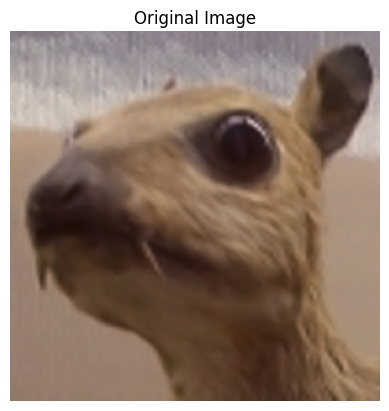

In [12]:
# ------------------------------
# Step 1: Load the image
# ------------------------------
image = io.imread(r"D:\SIStec\ML\Clustering\Vd-Orig.png")

plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [22]:
# ------------------------------
# Step 2: Reshape image into (num_pixels, 3)
# ------------------------------
pixels = image.reshape(-1, 3)

# ------------------------------
# Step 3: Apply K-Means for color quantization
# ------------------------------
K = 256 # number of colors to compress into

kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(pixels)


,n_clusters,256
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


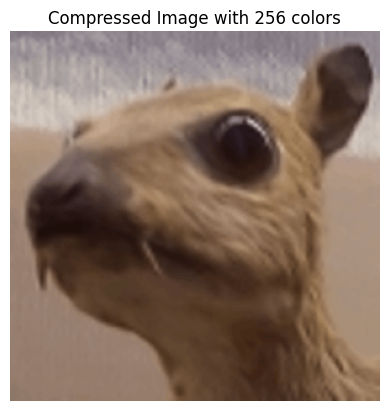

In [23]:


# ------------------------------
# Step 4: Replace each pixel with its centroid color
# ------------------------------
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_].astype('uint8')
compressed_image = compressed_pixels.reshape(image.shape)

# ------------------------------
# Step 5: Show compressed image
# ------------------------------
plt.imshow(compressed_image)
plt.title(f"Compressed Image with {K} colors")
plt.axis('off')
plt.show()


In [24]:
import os

import imageio
# Save original image
imageio.imwrite("original.png", image)

# Save compressed image
imageio.imwrite("compressed_kmeans.png", compressed_image)

orig_size = os.path.getsize("original.png")
comp_size = os.path.getsize("compressed_kmeans.png")

print("Original Image Size: ", orig_size / 1024, "KB")
print("Compressed Image Size:", comp_size / 1024, "KB")

compression_ratio = orig_size / comp_size
print("Compression Ratio: {:.2f}x smaller".format(compression_ratio))


Original Image Size:  83.3857421875 KB
Compressed Image Size: 70.513671875 KB
Compression Ratio: 1.18x smaller
